In [25]:
# This is a titianic example from Kaggle
# https://www.kaggle.com/c/titanic

import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [5]:
data = pd.read_csv('train.csv')
data.info() # a lot datas are missing("Age","Cabin")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
#A general view for the dataset
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
#Data pre-preparation
data.drop(['Cabin','Name','Ticket'],inplace=True,axis = 1)
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [8]:
#missing values in "Age"
data['Age'] = data['Age'].fillna(data["Age"].mean())
data.info() # All values all filled, but still there're 2 missing values in "Embarked" column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB


In [9]:
data = data.dropna()

In [10]:
#Now it is sorted
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Sex          889 non-null    object 
 4   Age          889 non-null    float64
 5   SibSp        889 non-null    int64  
 6   Parch        889 non-null    int64  
 7   Fare         889 non-null    float64
 8   Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 69.5+ KB


In [11]:
method = data['Embarked'].unique().tolist()
method

['S', 'C', 'Q']

In [12]:
#Transfering Embarked's value into digit
data['Embarked'] = data['Embarked'].apply(lambda x : method.index(x))


In [13]:
data # Embarked column is presented as int now

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.000000,1,0,7.2500,0
1,2,1,1,female,38.000000,1,0,71.2833,1
2,3,1,3,female,26.000000,0,0,7.9250,0
3,4,1,1,female,35.000000,1,0,53.1000,0
4,5,0,3,male,35.000000,0,0,8.0500,0
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.000000,0,0,13.0000,0
887,888,1,1,female,19.000000,0,0,30.0000,0
888,889,0,3,female,29.699118,1,2,23.4500,0
889,890,1,1,male,26.000000,0,0,30.0000,1


In [14]:
# Now do the same thing to 'Sex' column
data['Sex'] = (data['Sex']=='male').astype('int')

In [15]:
data #works! 1 represents male, 0 represents female! , as of now, the data pre-preparation is done

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.000000,1,0,7.2500,0
1,2,1,1,0,38.000000,1,0,71.2833,1
2,3,1,3,0,26.000000,0,0,7.9250,0
3,4,1,1,0,35.000000,1,0,53.1000,0
4,5,0,3,1,35.000000,0,0,8.0500,0
...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.000000,0,0,13.0000,0
887,888,1,1,0,19.000000,0,0,30.0000,0
888,889,0,3,0,29.699118,1,2,23.4500,0
889,890,1,1,1,26.000000,0,0,30.0000,1


In [16]:
# Moving into sklearn
x = data.iloc[:, data.columns!= 'Survived']
y = data.iloc[:,data.columns =='Survived']

In [17]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,Ytrain,Ytest = train_test_split(x,y,test_size = 0.3)

In [18]:
#Fixing Index (was messy)
for i in [Xtrain,Xtest,Ytrain,Ytest]:
    i.index = range(i.shape[0])

In [19]:
Xtest # now is sorted

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,485,1,1,25.000000,1,0,91.0792,1
1,713,1,1,48.000000,1,0,52.0000,0
2,119,1,1,24.000000,0,1,247.5208,1
3,285,1,1,29.699118,0,0,26.0000,0
4,572,1,0,53.000000,2,0,51.4792,0
...,...,...,...,...,...,...,...,...
262,616,2,0,24.000000,1,2,65.0000,0
263,585,3,1,29.699118,0,0,8.7125,1
264,877,3,1,20.000000,0,0,9.8458,0
265,287,3,1,30.000000,0,0,9.5000,0


In [22]:
clf = DecisionTreeClassifier(random_state=20) 
clf = clf.fit(Xtrain,Ytrain) 
score = clf.score(Xtest,Ytest) 
score # Not a satisify result

0.7902621722846442

In [26]:
clf = DecisionTreeClassifier(random_state=20) 
score = cross_val_score(clf,x,y,cv=10).mean()
score#Even worse result

np.float64(0.7492211440245148)

0.8166624106230849


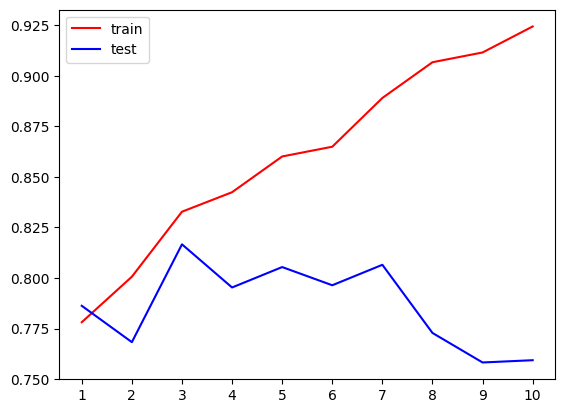

In [28]:
tr =[]
te = []

for i in range(10):
    clf = DecisionTreeClassifier(random_state=25
                                ,max_depth=i+1
                                ,criterion = 'entropy'
                                )
    clf = clf.fit(Xtrain,Ytrain)
    score_tr = clf.score(Xtrain,Ytrain)
    score_te = cross_val_score(clf,x,y,cv=10).mean()
    tr.append(score_tr)
    te.append(score_te)
print(max(te))
plt.plot(range(1,11),tr,color='red',label='train')
plt.plot(range(1,11),te,color='blue',label='test')
plt.xticks(range(1,11))
plt.legend()
plt.show() #Best max_depth is 3

In [34]:
#Grid Search
import numpy as np



parameters ={'criterion':('gini','entropy')
            ,'splitter':('best','random')
            ,'max_depth':list(range(1,10))
            ,'min_samples_leaf':list(range(1,50,5))
            ,'min_impurity_decrease':np.linspace(0,0.5,50)
            }


clf = DecisionTreeClassifier(random_state=20)
gs = GridSearchCV(clf, parameters, cv=10)
gs= gs.fit(Xtrain,Ytrain)

In [35]:
gs.best_params_

{'criterion': 'gini',
 'max_depth': 6,
 'min_impurity_decrease': np.float64(0.0),
 'min_samples_leaf': 1,
 'splitter': 'random'}

In [36]:
gs.best_score_

np.float64(0.8312339989759344)